# The Big Mac Index - Exploratory Data Analysis
## Skills: Python, Pandas, Matplotlib

Download the Jupyter Notebook from [GitHub](https://nicomoriuala.github.io)

<a id='content' />

## Contents

1. [Introduction](#introduction)
2. [Burgernomics across time](#time_evol)
3. [Burgernomics in 2020](#present)
4. [Bonus track: currency volatility](#volatility)

<a id='introduction' />

## Introduction
[(back to top)](#content)

[The Economist's Big Mac Index](https://www.economist.com/news/2020/07/15/the-big-mac-index) was invented in 1986 as a lighthearted guide to whether currencies are at their “correct” level. It is based on the theory of purchasing-power parity (PPP), the notion that in the long run exchange rates should move towards the rate that would equalise the prices of an identical basket of goods and services (in this case, a burger) in any two countries.

Burgernomics was never intended as a precise gauge of currency misalignment, merely a tool to make exchange-rate theory more digestible. Yet the Big Mac index has become a global standard, included in several economic textbooks and the subject of dozens of academic studies.

In this project we will take a look at how the Big Mac index evolved in the last 20 years and draw some insights from the last edition, published in July 2020.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Setting some default visualization parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style('whitegrid')

The Economist has made the data for the index (along with the scripts used for the calculations) available in their [repository in GitHub](https://github.com/TheEconomist/big-mac-data). A list with the continent of each country that appears in the index will be added the allow further analysis.

In [2]:
# Loading The Economist's and the continent datasets
dfbigmac = pd.read_csv('Datasets/big-mac-full-index.csv')
continents = pd.read_csv('Datasets/continents.csv', delimiter=';')

#Merging
dfbigmac = dfbigmac.merge(continents, how='left', left_on='name', right_on='name')

#Quick inspection
display(dfbigmac.tail())
dfbigmac.info()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted,continent
1381,2020-07-01,UKR,UAH,Ukraine,59.00,27.1300,2.174714,-0.61914,-0.54562,-0.49157,-0.40181,-0.29813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
1382,2020-07-01,URY,UYU,Uruguay,189.00,43.6750,4.327418,-0.24213,-0.09584,0.01171,0.19032,0.39664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,America
1383,2020-07-01,USA,USD,United States,5.71,1.0000,5.710000,0.00000,0.19303,0.33494,0.57062,0.84286,62868.917,5.174502,0.000,-0.019,0.122,0.279,0.070,America
1384,2020-07-01,VNM,VND,Vietnam,66000.00,23180.0000,2.847282,-0.50135,-0.40510,-0.33433,-0.21681,-0.08106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1385,2020-07-01,ZAF,ZAR,South Africa,31.00,16.6725,1.859349,-0.67437,-0.61151,-0.56530,-0.48856,-0.39991,6353.846,2.871878,-0.413,-0.425,-0.342,-0.249,-0.372,Africa


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1385
Data columns (total 20 columns):
date             1386 non-null object
iso_a3           1386 non-null object
currency_code    1386 non-null object
name             1386 non-null object
local_price      1386 non-null float64
dollar_ex        1386 non-null float64
dollar_price     1386 non-null float64
USD_raw          1386 non-null float64
EUR_raw          1386 non-null float64
GBP_raw          1386 non-null float64
JPY_raw          1386 non-null float64
CNY_raw          1386 non-null float64
GDP_dollar       702 non-null float64
adj_price        702 non-null float64
USD_adjusted     702 non-null float64
EUR_adjusted     702 non-null float64
GBP_adjusted     702 non-null float64
JPY_adjusted     702 non-null float64
CNY_adjusted     702 non-null float64
continent        1386 non-null object
dtypes: float64(15), object(5)
memory usage: 227.4+ KB


The table above shows that the GDP and adjusted columns have missing values. This is because the adjusted index (based on the GDP per capita) was introduced in July 2011 and has a reduced number of countries, while the full index sometimes add or remove countries.

The index is calculated over 5 'base' currencies, but to keep it simple we will only analyze the one based on the US dollar (which is also the most representative), dropping the other ones. Country and currency codes will be also dropped.  

In [3]:
#Formatting date
dfbigmac['date'] = pd.to_datetime(dfbigmac['date'])

#Subsetting columns
df_light = dfbigmac[['date','name','continent','local_price','dollar_ex','dollar_price','USD_raw','GDP_dollar','adj_price','USD_adjusted']]

df_light.tail()

,date,name,continent,local_price,dollar_ex,dollar_price,USD_raw,GDP_dollar,adj_price,USD_adjusted
1381,2020-07-01,Ukraine,Europe,59.00,27.1300,2.174714,-0.61914,NaN,NaN,NaN
1382,2020-07-01,Uruguay,America,189.00,43.6750,4.327418,-0.24213,NaN,NaN,NaN
1383,2020-07-01,United States,America,5.71,1.0000,5.710000,0.00000,62868.917,5.174502,0.000
1384,2020-07-01,Vietnam,Asia,66000.00,23180.0000,2.847282,-0.50135,NaN,NaN,NaN
1385,2020-07-01,South Africa,Africa,31.00,16.6725,1.859349,-0.67437,6353.846,2.871878,-0.413


<a id='time_evol' />

## Burgernomics across time
[(back to top)](#jeje)

Since April 2000, there have been 33 editions of the index. While it was usually updated at the middle of each year (with some exceptions in 2006, 2007 and 2010), from 2012 it is updated in both January and July.

As it was previously said, The Economist sometimes adds or removes countries for the index. But how many haven't always been part of the index? And which ones stayed on the least?

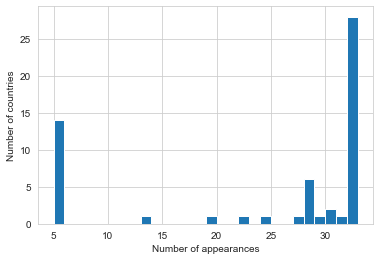

Jordan                  5
Honduras                5
Nicaragua               5
United Arab Emirates    5
Oman                    5
Lebanon                 5
Moldova                 5
Guatemala               5
Kuwait                  5
Azerbaijan              5
Bahrain                 5
Croatia                 5
Romania                 5
Qatar                   5
Name: name, dtype: int64

In [4]:
#How often do countries appear?
appearances=df_light['name'].value_counts()

#Plotting
appearances.hist(bins=28)
plt.xlabel('Number of appearances')
plt.ylabel('Number of countries')

plt.show()

#Countries that appeared least than 10 times
appearances[lambda x: x<=10]

The countries that appeared the least are from the Middle East, Central America and Eastern Europe. They all were part of the index for 5 editions. Coincidence or not, they all have developing economies.

This leads us to another question: How is the trend? Does the overall number of countries included in the index change over time or there is always the same number that comes and goes?

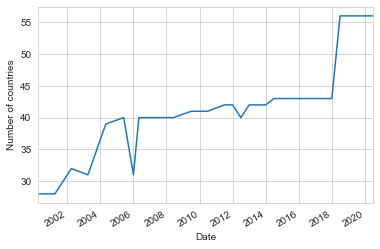

In [5]:
#Calculating and plotting countries by edition
df_light['date'].value_counts().plot(kind='line')
plt.ylabel('Number of countries')
plt.xlabel('Date')

plt.show()

We can see that there is a pattern to increase the number of countries in the index. In the last twenty years has gone from 28 to 56 countries, doubling its size.

Now, what has happened with the price of the Big Mac in the US, used as a base for all the other numbers to compare? As a reference, the [American Consumer Price Index](https://www.bls.gov/data/inflation_calculator.htm) in the same period has increased a 51%.

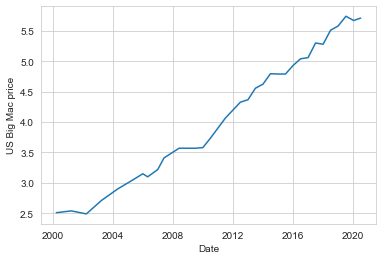

In [6]:
#Subsetting data
df_light[df_light['name']=='United States']

#Plotting price evolution
plt.plot( 'date', 'local_price', data=df_light[df_light['name']=='United States'])
plt.ylabel('US Big Mac price')
plt.xlabel('Date')

plt.show()

Going from \\$2.51 to \\$5.71 the Big Mac has more than doubled its price in the US (a 127.5% increase to be precise), way more than the increase of the Consumer Price Index, which makes us [question the reliability](https://www.investopedia.com/articles/07/consumerpriceindex.asp) of the last one. Notice also that the price stayed stable in the years that followed financial crisis (the burst of the .com bubble in 2000 and the subprime mortgages in 2008).

What happened with the price in the other countries? We made a ranking with the 5 countries with the highest and the lowest variations in their local currencies to get an idea.

In [7]:
#Subsetting the prices of the first and last edition
price_first_ed = df_light[df_light['date']=='2000-04-01'][['name','local_price']]
price_last_ed = df_light[df_light['date']=='2020-07-01'][['name','local_price']]

#Merging and comparing
prices = price_first_ed.merge(price_last_ed, how='inner', left_on='name', right_on='name', suffixes=('_2000','_2020'))
prices['variation'] = prices['local_price_2020']/prices['local_price_2000']-1

display(prices.nlargest(5, 'variation'))
display(prices.nsmallest(5, 'variation'))

,name,local_price_2000,local_price_2020,variation
0,Argentina,2.50,250.0,99.000000
2,Brazil,2.95,20.9,6.084746
27,South Africa,9.00,31.0,2.444444
21,Russia,39.50,135.0,2.417722
12,Hungary,339.00,900.0,1.654867


,name,local_price_2000,local_price_2020,variation
25,Taiwan,70.00,72.0,0.028571
4,Switzerland,5.90,6.5,0.101695
14,Israel,14.50,17.0,0.172414
8,Denmark,24.75,30.0,0.212121
15,Japan,294.00,390.0,0.326531


The ranking shows us that the prices have increased in all the countries, altough in very different measures. While in countries like Israel, Switzerland and Taiwan they increased less than 20%, in Argentina the variation was of 9900%, which means that today you need 100 times the money you needed in 2000 to buy a Big Mac!

Having an idea about how the index evolved over time, we will next take a look at the last edition.

<a id='present' />

## Burgernomics in 2020
[(back to top)](#content)

First, we will rank the countries by the price in US dollars of the Big Mac, to see if there are any patterns.

In [8]:
#Subsetting last edition
last_ed=df_light[df_light['date']=='2020-07-01']

display(last_ed.nlargest(5, 'dollar_price'))
display(last_ed.nsmallest(5, 'dollar_price'))

,date,name,continent,local_price,dollar_ex,dollar_price,USD_raw,GDP_dollar,adj_price,USD_adjusted
1337,2020-07-01,Switzerland,Europe,6.50,0.94125,6.905710,0.20941,83161.895,6.001310,0.043
1359,2020-07-01,Lebanon,Asia,9000.00,1512.00000,5.952381,0.04245,NaN,NaN,NaN
1377,2020-07-01,Sweden,Europe,52.60,9.13840,5.755931,0.00804,54356.073,4.827658,0.080
1383,2020-07-01,United States,America,5.71,1.00000,5.710000,0.00000,62868.917,5.174502,0.000
1365,2020-07-01,Norway,Europe,52.00,9.37105,5.549005,-0.02820,81549.977,5.935634,-0.153


,date,name,continent,local_price,dollar_ex,dollar_price,USD_raw,GDP_dollar,adj_price,USD_adjusted
1385,2020-07-01,South Africa,Africa,31.00,16.6725,1.859349,-0.67437,6353.846,2.871878,-0.413
1374,2020-07-01,Russia,Asia,135.00,70.5850,1.912588,-0.66505,11289.439,3.072971,-0.436
1379,2020-07-01,Turkey,Asia,13.99,6.8595,2.039507,-0.64282,9405.321,2.996206,-0.383
1381,2020-07-01,Ukraine,Europe,59.00,27.1300,2.174714,-0.61914,NaN,NaN,NaN
1362,2020-07-01,Mexico,America,50.00,22.4360,2.228561,-0.60971,9796.976,3.012163,-0.330


There is a big difference between the top and the bottom of the ranking. A Big Mac in Switzerland costs up to 3.7 times more than in South Africa. We see that all the countries in the top of the list (except for Lebanon) are countries with a high GDP per capita, while the ones in the bottom have a low GDP.

To check if there is a correlation between the GDP per capita and the price of the Big Mac we are going to use a scatter plot.

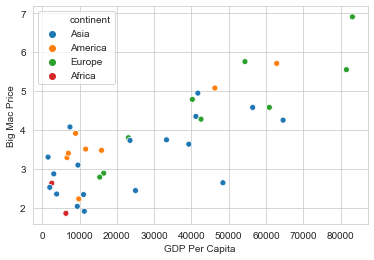

In [9]:
#Scatterplot for GDP per capita and Big Mac price in US dollars
sns.scatterplot(data=last_ed, x='GDP_dollar', y='dollar_price', hue='continent')
plt.xlabel('GDP Per Capita')
plt.ylabel('Big Mac Price')

plt.show()

There is a clear correlation between the two variables. This makes sense, you would expect average burger prices to be cheaper in poor countries than in rich ones because costs such as rent and worker’s wages are lower. To address this issue The Economist created an adjusted index, by using a linear regression of GDP vs Big Mac Price.

We will compare both versions to see how the correction affects the ranking.

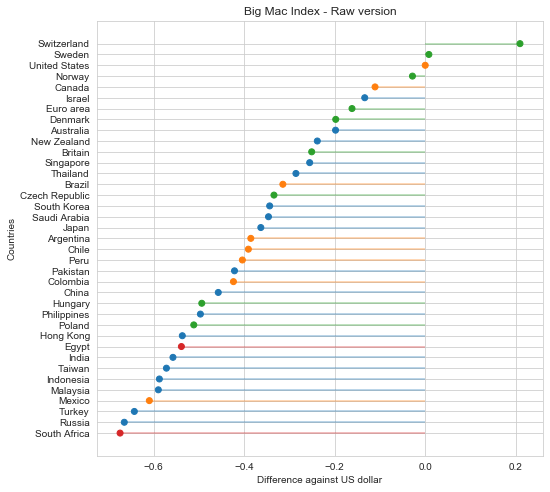

In [10]:
#Filtering countries with no GDP data and ordering by raw index
last_ed_gdp=last_ed.dropna().sort_values(by='USD_raw')
my_range=range(1,len(last_ed_gdp.index)+1)

#Color palette
my_color=np.where(last_ed_gdp['continent']=='Asia', '#1f77b4',
                  np.where(last_ed_gdp['continent']=='America','#ff7f0e',
                          np.where(last_ed_gdp['continent']=='Europe','#2ca02c','#d62728')))
 
#Lollipop plot
plt.figure(figsize=(8,8))
plt.hlines(y=my_range, xmin=0, xmax=last_ed_gdp['USD_raw'], color=my_color, alpha=0.4)
plt.scatter(last_ed_gdp['USD_raw'], my_range, color=my_color, alpha=1)
 
#Title and exis names
plt.yticks(my_range, last_ed_gdp['name'])
plt.title("Big Mac Index - Raw version")
plt.xlabel('Difference against US dollar')
plt.ylabel('Countries')

plt.show()

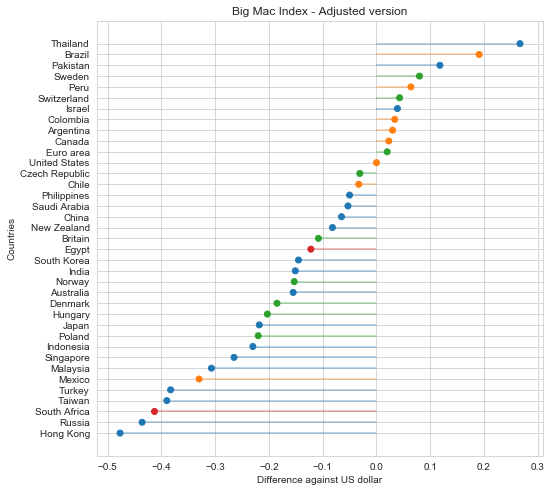

In [11]:
#Filtering countries with no GDP data and ordering by adjusted index
last_ed_gdp=last_ed.dropna().sort_values(by='USD_adjusted')
my_range=range(1,len(last_ed_gdp.index)+1)

#Color palette
my_color=np.where(last_ed_gdp['continent']=='Asia', '#1f77b4',
                  np.where(last_ed_gdp['continent']=='America','#ff7f0e',
                          np.where(last_ed_gdp['continent']=='Europe','#2ca02c','#d62728')))
 
#Lollipop plot
plt.figure(figsize=(8,8))
plt.hlines(y=my_range, xmin=0, xmax=last_ed_gdp['USD_adjusted'], color=my_color, alpha=0.4)
plt.scatter(last_ed_gdp['USD_adjusted'], my_range, color=my_color, alpha=1)
 
#Title and exis names
plt.yticks(my_range, last_ed_gdp['name'])
plt.title("Big Mac Index - Adjusted version")
plt.xlabel('Difference against US dollar')
plt.ylabel('Countries')

plt.show()

There clearly is a difference when adjusting the index to GDP. 

<a id='volatility' />

## Bonus track: currency volatility
[(back to top)](#content)

While the main objective of the Big Mac Index is to determine wheter a country's currency is too cheap or too expensive, the data can be used to draw alternative insights. For example, the volatility of a country's exchange rate.

What is the relevance of this indicator? Let's put it this way: Foreign investors inevitably seek out stable countries with strong economic performance in which to invest their capital. A country with such positive attributes will draw investment funds away from other countries perceived to have more political and economic risk.

By analyzing the standard deviation of each country's adjusted index along time we can determine how stable are their exchange rates.

In [12]:
#Obtaining the standard deviation for each country in the adjusted index
variation=df_light.dropna().groupby('name')['USD_adjusted'].std()

#Sorting and rounding the list
variation=round(variation.sort_values(ascending=False),2)

#Mean standard devation and countries above the average
print('The average standard deviation is', round(variation.mean(), 2))
variation[variation>variation.mean()]

The average standard deviation is 0.15


name
Argentina         0.36
Turkey            0.35
Colombia          0.35
Brazil            0.33
Sweden            0.20
Hungary           0.20
Peru              0.19
Chile             0.19
Norway            0.18
Russia            0.17
Philippines       0.17
Egypt             0.16
Switzerland       0.16
Czech Republic    0.15
South Africa      0.15
Name: USD_adjusted, dtype: float64

There are 15 out of 37 countries with a standard deviation above average. But only 4 really stand out: Argentina, Turkey, Colombia and Brazil. The common denominator is that they all are developing economies (and 3 of them are from South America). 

We will plot the evolution of each country's index in order to see if they have simmilar trends.

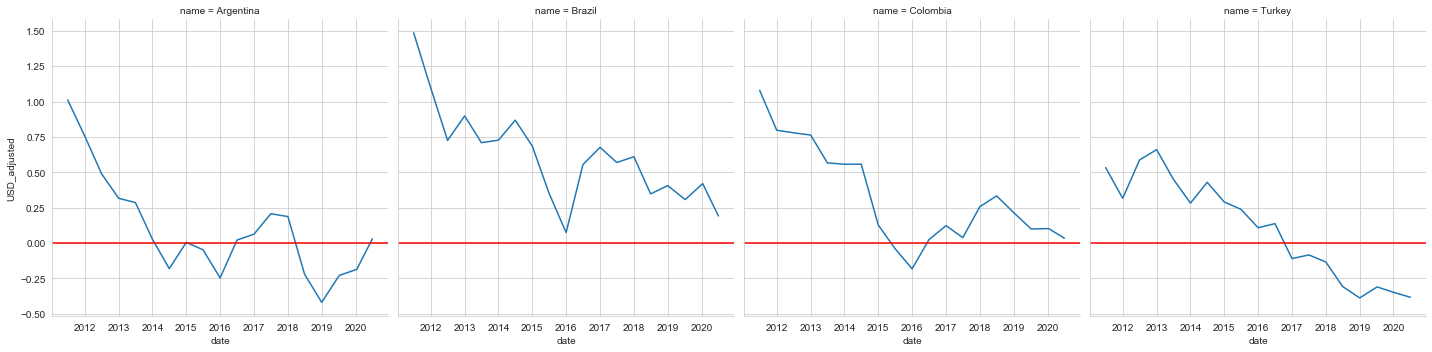

In [13]:
#Subsetting high variation countries
unstable_countries=df_light[df_light['name'].isin(['Argentina','Turkey','Colombia','Brazil'])].dropna()

#Line plot with country faceting
index_evol=sns.relplot(x='date', y='USD_adjusted', data=unstable_countries, kind='line', col='name')

#Horizontal lines
for ax in index_evol.axes.flat:
    ax.axhline(0, color='red')

plt.show()

The index for the South American countries have a simmilar trend: They were quite overvaluated at the beggining of the decade, started decreasing until 2016, then increased until 2018 and fell again (although Argentina's index has been increasing since 2019). In the same period, Turkey's currency has been steadily depreciating.